<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/GRU_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !wget 'https://www.gutenberg.org/files/236/236-0.txt'

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [7]:
#LOAD TEXT
#Save notepad as UTF-8 (select from dropdown during saving)
filename = "/content/236-0.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])
# 

﻿the project gutenberg ebook of the jungle book, by rudyard kipling

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: the jungle book

author: rudyard kipling

release date: january 16, 2006 [ebook #236]
last updated: october 6, 2016

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook the jungle book ***




produced by an anonymous volunteer and david widger





the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darzee’s chant
     toomai of the elephants
     shiv and the grasshopper
     her majesty’s servants
     parade so

In [8]:
#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [9]:
#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character

In [10]:
#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [11]:
#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

# summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  292870
Total Vocab:  51


In [12]:
#Now that we have characters we can create input/output sequences for training
#Remember that for LSTM input and output can be sequences... hence the term seq2seq

seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few. 
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 29281


In [13]:
#Just like time series, X is the sequence / sentence and y is the next value
#that comes after the sentence... 

# reshape input to be [samples, time steps, features]
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

(29281, 60, 51)
(29281, 51)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False  True False F

In [14]:
#Basic model with one LSTM
# build the model: a single LSTM

model = Sequential()
model.add(GRU(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               69504     
_________________________________________________________________
dense (Dense)                (None, 51)                6579      
Total params: 76,083
Trainable params: 76,083
Non-trainable params: 0
_________________________________________________________________


In [15]:
# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [17]:
# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=10,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/10
229/229 [==============================] - 27s 118ms/step - loss: 1.7422

Epoch 00001: loss improved from 1.94501 to 1.74221, saving model to saved_weights/saved_weights-01-1.7422.hdf5
Epoch 2/10
229/229 [==============================] - 27s 118ms/step - loss: 1.6189

Epoch 00002: loss improved from 1.74221 to 1.61886, saving model to saved_weights/saved_weights-02-1.6189.hdf5
Epoch 3/10
229/229 [==============================] - 27s 118ms/step - loss: 1.5252

Epoch 00003: loss improved from 1.61886 to 1.52516, saving model to saved_weights/saved_weights-03-1.5252.hdf5
Epoch 4/10
229/229 [==============================] - 27s 118ms/step - loss: 1.4505

Epoch 00004: loss improved from 1.52516 to 1.45051, saving model to saved_weights/saved_weights-04-1.4505.hdf5
Epoch 5/10
229/229 [==============================] - 27s 118ms/step - loss: 1.3933

Epoch 00005: loss improved from 1.45051 to 1.39330, saving model to saved_weights/saved_weights-05-1.3933.hdf5
Epoch 6/10
229/229 [

In [ ]:
# Deeper model woth 2 LSTM
#To stack LSTM layers, we need to change the configuration of the prior 
#LSTM layer to output a 3D array as input for the subsequent layer.
#We can do this by setting the return_sequences argument on the layer to True 
#(defaults to False). This will return one output for each input time step and provide a 3D array.
#Below is the same example as above with return_sequences=True.

#model = Sequential()
#model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#optimizer = RMSprop(lr=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#model.summary()

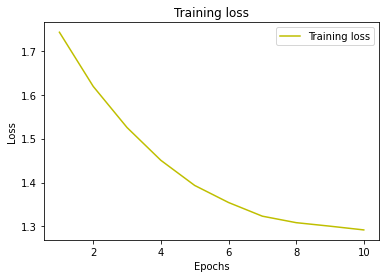

In [18]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [21]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)

----- Seed for our text prediction: " know, he has an extra joint in his
foreflipper, and by wavi"


In [22]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

st swit was the end wat he had the live
roter in his out things his head dad nove he cank theisgot only gould
balhes measty.  akels, wergetennersaid, whith my cries tickly
belangul for you mowh have hust him benderocks. his is thein for he wacr hoous the withoruteed
him comilat of shere, knowly their mery will chreest tow they with pritting

projeingiosi, it me a weelding on their
the elophants, s
